# Understanding Descriptive Statistics

Import the necessary libraries here:

In [34]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
# your code here
def dice_10():
    df = pd.DataFrame({'Times':np.arange(1,11), 'Dice_No.':np.random.randint(1,7,size=(10))})
    return(df)
dice_10()

,Times,Dice_No.
0,1,1
1,2,4
2,3,3
3,4,4
4,5,5
5,6,4
6,7,2
7,8,3
8,9,1
9,10,3


#### 2.- Plot the results sorted by value.

   Times  Dice_No.
0      1         3
1      2         3
2      3         2
3      4         6
4      5         3
5      6         2
6      7         5
7      8         5
8      9         4
9     10         3


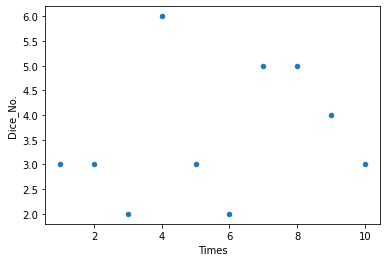

In [4]:
# your code here
df1=dice_10()
print(df1)
df1.plot('Times', 'Dice_No.', kind='scatter')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

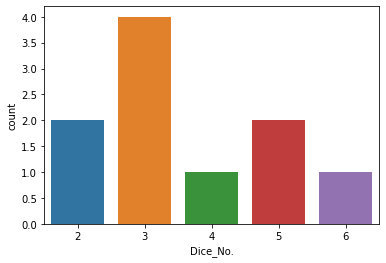

In [5]:
# your code here
sns.countplot(x="Dice_No.",data=df1)

In [23]:
"""
your comments here
summarizing the distributional information of the rolls, sum of all Dice_No.'s frequecy equals to 10
"""

"\nyour comments here\nsummarizing the distributional information of the rolls, sum of all Dice_No.'s frequecy equals to 10\n"

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
def mean(df):
    d_sum = 0
    for d in df['Dice_No.']:
        d_sum += d
    return(d_sum/len(df))

mean(df1)

3.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
arr1 = df1['Dice_No.'].value_counts()
dict1 = arr1.to_dict()

d_sum2 = 0
for D,T in dict1.items():
    d_sum2 += D*T
    
print(d_sum2/len(df1))

3.6


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# your code here

def median(df):
    lst = sorted(df['Dice_No.'].to_list())
    
    #round down coz index start with 0
    mid = len(lst)//2
    
    #when the list has an odd length
    if len(lst)%2 != 0: 
        return lst[mid]
    
    #when the list has an even length
    else:
        mid2 = (lst[mid] + lst[mid-1]) / 2
        return mid2

median(df1)

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
#to check the list and verify the result of the quart()
lst = sorted(df1['Dice_No.'].to_list())
lst

[2, 2, 3, 3, 3, 3, 4, 5, 5, 6]

In [10]:
# your code here
import math
def quart(df):
    lst = sorted(df['Dice_No.'].to_list())
    #when the list has an even length
    i1=len(lst)/4
    i3=len(lst)*3/4
    q1=(lst[math.floor(i1)-1]+lst[math.ceil(i1)-1])/2
    q3=(lst[math.floor(i3)-1]+lst[math.ceil(i3)-1])/2
    return([q1,q3])
quart(df1)

[2.5, 4.5]

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [11]:
# your code here

from google.colab import files
uploaded = files.upload()

Saving roll_the_dice_hundred.csv to roll_the_dice_hundred.csv


In [12]:
import io
data1 = pd.read_csv(io.BytesIO(uploaded['roll_the_dice_hundred.csv']))
# Dataset is now stored in a Pandas Dataframe


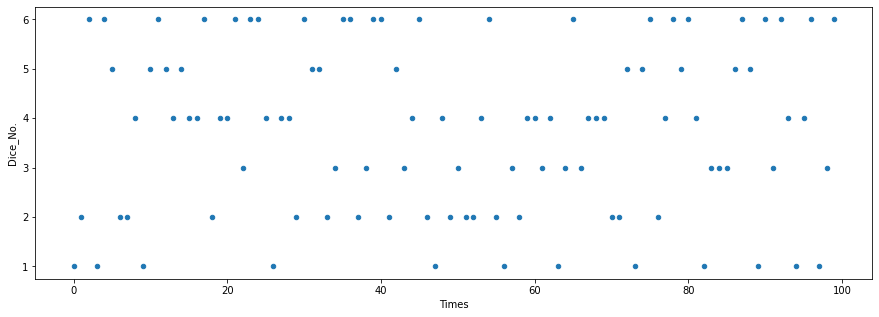

In [24]:
data1 = data1.rename(columns={'roll': 'Times','value':'Dice_No.'})
data1

data1.plot(x='Times',y='Dice_No.',figsize=(15,5),kind='scatter')

In [ ]:
"""
your comments here
roll count & dice values for 100 times rolling 
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [14]:
# your code here
mean(data1)

3.74

#### 3.- Now, calculate the frequency distribution.


In [15]:
# your code here
data1['Dice_No.'].value_counts()

6    23
4    22
2    17
3    14
1    12
5    12
Name: Dice_No., dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

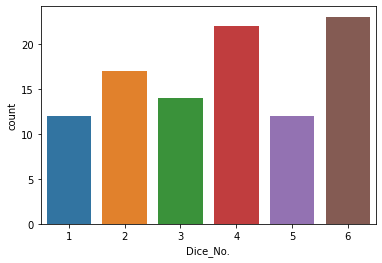

In [25]:
# your code here
sns.countplot(x="Dice_No.",data=data1)

In [17]:
"""
your comments here
the distribution is quite average, lightly right-skewed, s the mean should be in between 3&4, closer to 4
"""

'\nyour comments here\nthe distribution is quite average, lightly right-skewed, s the mean should be in between 3&4, closer to 4\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [18]:
# your code here
from google.colab import files
uploaded = files.upload()

Saving roll_the_dice_thousand.csv to roll_the_dice_thousand.csv


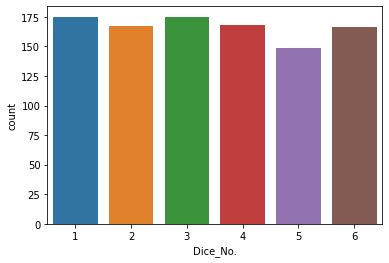

In [27]:
import io
data2 = pd.read_csv(io.BytesIO(uploaded['roll_the_dice_thousand.csv']))

data2 = data2.rename(columns={'roll': 'Times','value':'Dice_No.'})
#data2
sns.countplot(x="Dice_No.",data=data2)

In [ ]:
"""
your comments here
the frequency distribution in 1000 times rolling became more average, since there are more tries, the probability turns more to theoritical prob
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [28]:
# your code here
from google.colab import files
uploaded = files.upload()


Saving ages_population.csv to ages_population.csv


In [30]:
import io
a_p = pd.read_csv(io.BytesIO(uploaded['ages_population.csv']))

a_p['observation'].value_counts()

39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
        ..
73.0     1
82.0     1
70.0     1
71.0     1
69.0     1
Name: observation, Length: 72, dtype: int64

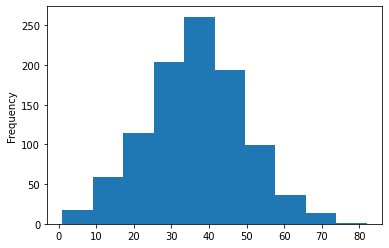

In [31]:
a_p['observation'].plot.hist()

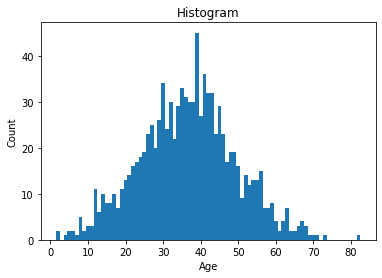

In [32]:
max_range = int(a_p['observation'].max()) + 1
min_range = int(a_p['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
a_p['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [33]:
# your code here
print('mean:', float(a_p.mean()))
print('standard deviation:', round(float(a_p.std()),2))

mean: 36.56
standard deviation: 12.82


In [ ]:
"""
your comments here
yes they fall inside
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [35]:
# your code here
from google.colab import files
uploaded = files.upload()


Saving ages_population2.csv to ages_population2.csv


In [38]:
import io
a_p2 = pd.read_csv(io.BytesIO(uploaded['ages_population2.csv']))

a_p2.value_counts()

observation
28.0           139
27.0           125
26.0           120
29.0           115
25.0            98
30.0            90
24.0            78
31.0            61
23.0            41
22.0            35
32.0            31
33.0            22
21.0            17
20.0            13
34.0             7
35.0             3
19.0             3
36.0             2
dtype: int64

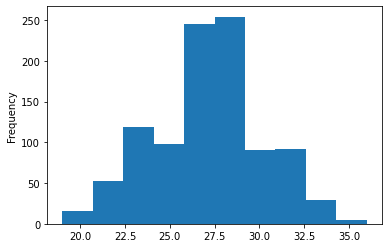

In [39]:
a_p2['observation'].plot.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
yes, only young people live in district 2
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [40]:
# your code here
print('mean:', float(a_p2.mean()))
print('standard deviation:', round(float(a_p2.std()),2))

mean: 27.155
standard deviation: 2.97


In [ ]:
"""
your comments here
younger average age, and smaller std cause the age range is more limited compare to the first one
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [41]:
# your code here
from google.colab import files
uploaded = files.upload()


Saving ages_population3.csv to ages_population3.csv


In [43]:
import io
a_p3 = pd.read_csv(io.BytesIO(uploaded['ages_population3.csv']))

a_p3.value_counts()

observation
32.0           37
37.0           31
35.0           31
39.0           29
36.0           26
               ..
8.0             1
7.0             1
5.0             1
76.0            1
1.0             1
Length: 75, dtype: int64

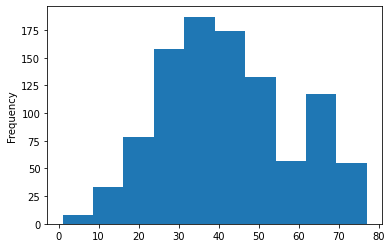

In [44]:
a_p3['observation'].plot.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [45]:
# your code here
print('mean:', float(a_p3.mean()))
print('standard deviation:', round(float(a_p3.std()),2))

mean: 41.989
standard deviation: 16.14


In [47]:
"""
your comments here
more aged people live in this district, large age range(maybe more family)
"""

'\nyour comments here\nmore aged people live in this district, large age range(maybe more family)\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [46]:
# your code here
a_p3.quantile([0,0.25,0.5,0.75,1])

,observation
0.00,1.0
0.25,30.0
0.50,40.0
0.75,53.0
1.00,77.0


In [ ]:
"""
your comments here
mean is around 11 years higher than median, since more aged people than young people, right skewed, so mean is larger than median
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [48]:
# your code here
a_p3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
your comments here
reasoning is pretty complete already
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""